In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [139]:
d = pd.read_csv("C:/Users/PUNEET/Desktop/deliveries.csv")
m = pd.read_csv("C:/Users/PUNEET/Desktop/matches.csv")

In [140]:
print(m)

           id   season        city        date   match_type  player_of_match  \
0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...       ...      ...         ...         ...          ...              ...   
1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc   

                                       

In [3]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [4]:
m.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [6]:
# city with most matches won
most_matches_won = m.groupby('city').agg({"winner":"count"}).max()
print(most_matches_won)

winner    173
dtype: int64


In [13]:
gp = m.groupby("city").agg({"winner":["count"]}).sort_values(ascending=False, by=("winner","count")).head(1)
print(gp)

       winner
        count
city         
Mumbai    173


In [14]:
# team that won most matches
team_most_win = m["winner"].value_counts().head(1)
print(team_most_win)

winner
Mumbai Indians    144
Name: count, dtype: int64


In [15]:
# player who won most of man of the match awards
man_of_the_match = m["player_of_match"].value_counts().head(1)
print(man_of_the_match)

player_of_match
AB de Villiers    25
Name: count, dtype: int64


In [17]:
# most frequent umpire 1
ump1 = m["umpire1"].value_counts().head(1)
print(ump1)

umpire1
AK Chaudhary    115
Name: count, dtype: int64


In [18]:
# most frequent umpire 2
ump2 = m["umpire2"].value_counts().head(1)
print(ump2)

umpire2
S Ravi    83
Name: count, dtype: int64


In [141]:
print(d)

        match_id  inning           batting_team                 bowling_team  \
0         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
1         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
2         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
3         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
4         335982       1  Kolkata Knight Riders  Royal Challengers Bangalore   
...          ...     ...                    ...                          ...   
260915   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260916   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260917   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260918   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   
260919   1426312       2  Kolkata Knight Riders          Sunrisers Hyderabad   

        over  ball       batter        

In [20]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [21]:
d.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [ ]:
# 3. visualizing the data


<Axes: title={'center': 'Top 15 winning team'}, xlabel='winner'>

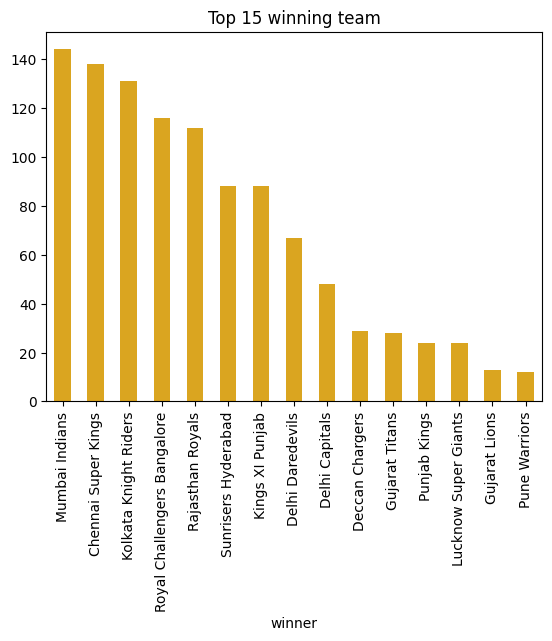

In [38]:
# Top 15 winning team
m["winner"].value_counts().head(15).plot(kind = "bar",color = "goldenrod",title = "Top 15 winning team")

<Axes: title={'center': 'Top 10 man of the match'}, xlabel='player_of_match'>

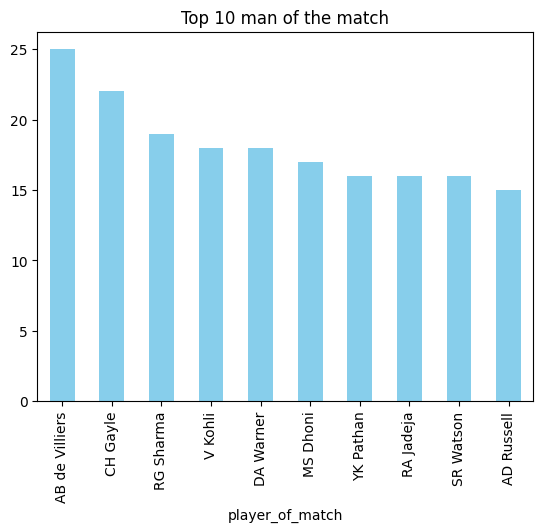

In [37]:
# top 10 man of the match
m["player_of_match"].value_counts().head(10).plot(kind = "bar",color = "skyblue",title = "Top 10 man of the match")

<Axes: title={'center': 'Top 15 toss winner'}, xlabel='toss_winner'>

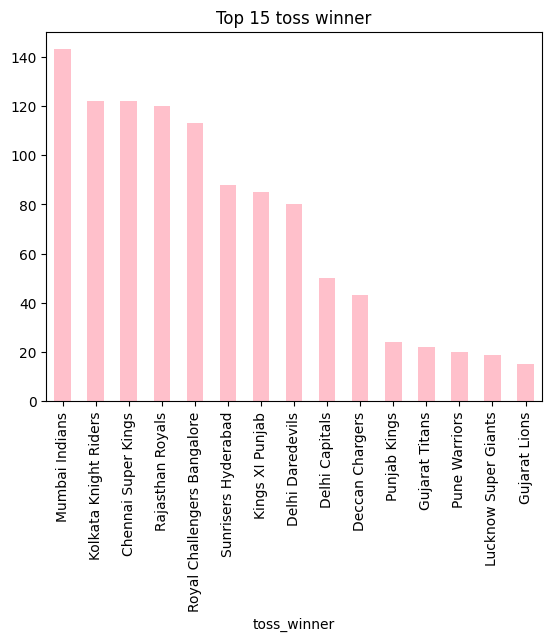

In [36]:

m["toss_winner"].value_counts().head(15).plot(kind = "bar",color = "pink", title = "Top 15 toss winner")

In [39]:
# Team who won toss who are toss winner as well as winner
a = m.groupby("toss_winner").agg({"winner":"count"}).max()
print(a)

winner    143
dtype: int64


In [135]:
b = m.groupby("toss_winner").agg({"winner":["count"]}).sort_values(ascending = False, by = ("winner","count"))
print(b)

                            winner
                             count
toss_winner                       
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            121
Rajasthan Royals               118
Royal Challengers Bangalore    112
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                79
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6


In [144]:
# Rename column in match table
m = m.rename(columns={"id":"match_id"})

In [145]:
print(m)

      match_id   season        city        date   match_type  player_of_match  \
0       335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
1       335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
2       335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
3       335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
4       335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
...        ...      ...         ...         ...          ...              ...   
1090   1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
1091   1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
1092   1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
1093   1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094   1426312     2024     Chennai  2024-05-26        Final         MA Starc   

                           

In [146]:
merged = pd.merge(m,d,on="match_id",how="left")

In [47]:
merged.columns

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [48]:
merged.isnull().sum()

match_id                 0
season                   0
city                 12397
date                     0
match_type               0
player_of_match        490
venue                    0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
winner                 490
result                   0
result_margin         4124
target_runs            309
target_overs           309
super_over               0
method              257274
umpire1                  0
umpire2                  0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [50]:
merged.dropna(how="all",axis = 1)

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [51]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          260920 non-null  int64  
 1   season            260920 non-null  object 
 2   city              248523 non-null  object 
 3   date              260920 non-null  object 
 4   match_type        260920 non-null  object 
 5   player_of_match   260430 non-null  object 
 6   venue             260920 non-null  object 
 7   team1             260920 non-null  object 
 8   team2             260920 non-null  object 
 9   toss_winner       260920 non-null  object 
 10  toss_decision     260920 non-null  object 
 11  winner            260430 non-null  object 
 12  result            260920 non-null  object 
 13  result_margin     256796 non-null  float64
 14  target_runs       260611 non-null  float64
 15  target_overs      260611 non-null  float64
 16  super_over        26

In [53]:
gp = m.groupby("season").agg({"match_id":"count"}).rename(columns = {"match_id":"number of matches"})
print(gp)

         number of matches
season                    
2007/08                 58
2009                    57
2009/10                 60
2011                    73
2012                    74
2013                    76
2014                    60
2015                    59
2016                    60
2017                    59
2018                    60
2019                    60
2020/21                 60
2021                    60
2022                    74
2023                    74
2024                    71


C:\Users\PUNEET\AppData\Local\Temp\ipykernel_40000\1009410416.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = gp, x = "season",y="number of matches",palette = "flare")


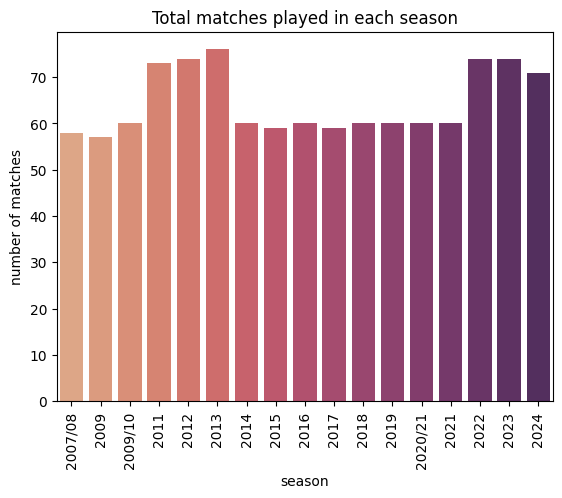

In [59]:
sns.barplot(data = gp, x = "season",y="number of matches",palette = "flare")
plt.xticks(rotation = 90)
plt.title('Total matches played in each season')
plt.show()

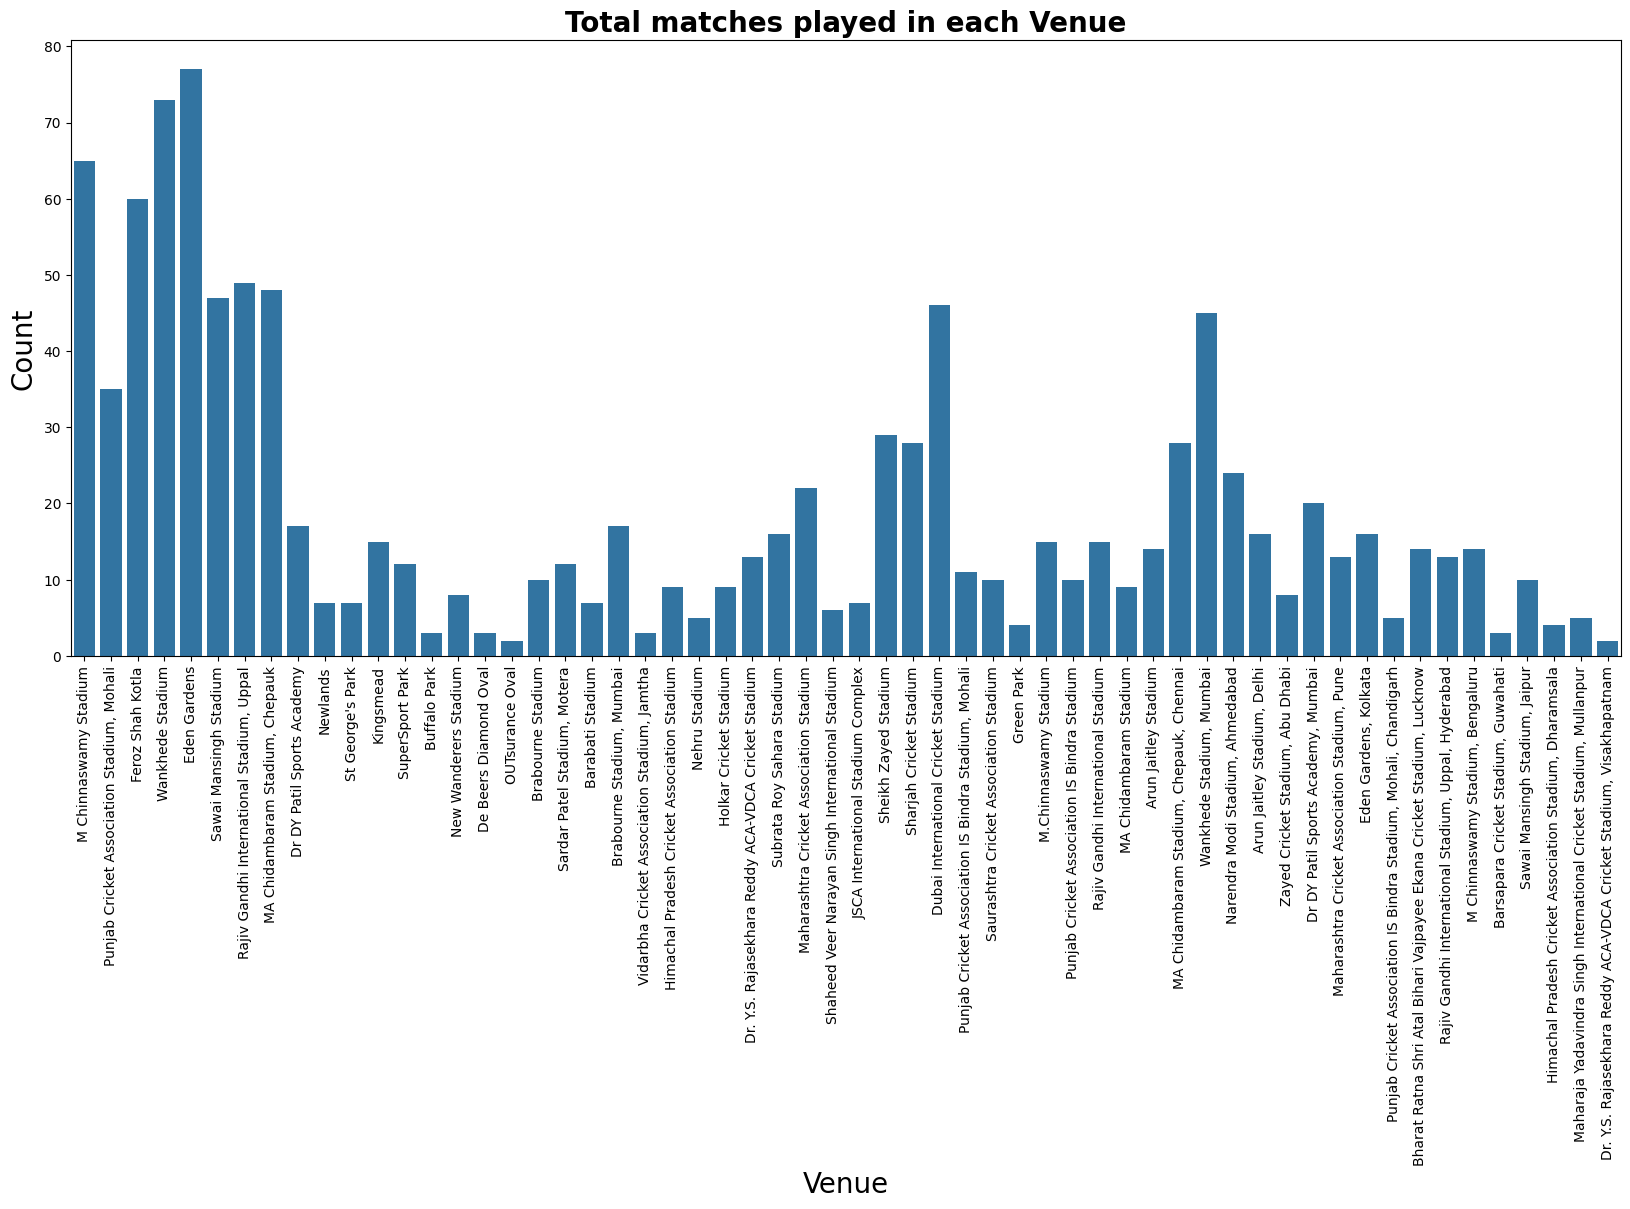

In [65]:
#Number of matches playes in each stadium
plt.figure(figsize=(20, 8))
sns.countplot(data=m,x="venue")
plt.xticks(rotation=90)
plt.xlabel('Venue', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Total matches played in each Venue', fontsize = 20, fontweight = "bold")
plt.show()

In [71]:
t1_toss_winner = ["team1","toss_winner"]
tab=merged[t1_toss_winner]
tab.groupby(["team1"]).agg("count")

,toss_winner
team1,
Chennai Super Kings,31138
Deccan Chargers,9448
Delhi Capitals,10082
Delhi Daredevils,19753
Gujarat Lions,3784
Gujarat Titans,4954
Kings XI Punjab,21848
Kochi Tuskers Kerala,1563
Kolkata Knight Riders,28560


In [72]:
gp = m.groupby("team1").agg({"match_id":"count"})
print(gp)

                             match_id
team1                                
Chennai Super Kings               128
Deccan Chargers                    39
Delhi Capitals                     41
Delhi Daredevils                   85
Gujarat Lions                      16
Gujarat Titans                     21
Kings XI Punjab                    92
Kochi Tuskers Kerala                7
Kolkata Knight Riders             121
Lucknow Super Giants               23
Mumbai Indians                    123
Pune Warriors                      23
Punjab Kings                       31
Rajasthan Royals                  101
Rising Pune Supergiant              7
Rising Pune Supergiants             7
Royal Challengers Bangalore       135
Royal Challengers Bengaluru         9
Sunrisers Hyderabad                86


In [81]:
gp = merged.groupby("season").agg({"total_runs":"sum"})
print(gp)


         total_runs
season             
2007/08       17937
2009          16353
2009/10       18883
2011          21154
2012          22453
2013          22602
2014          18931
2015          18353
2016          18862
2017          18786
2018          19901
2019          19434
2020/21       19416
2021          18637
2022          24395
2023          25688
2024          25971


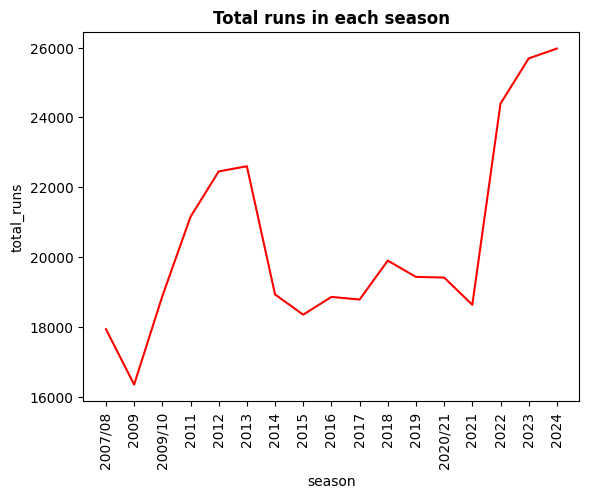

In [87]:
sns.lineplot(data = gp, x = "season", y = "total_runs",color="red")
plt.xticks(rotation=90)
plt.title('Total runs in each season',fontsize=12,fontweight="bold")
plt.show()

In [94]:
x = d.groupby("batting_team")["total_runs"].sum().reset_index().sort_values(by = "total_runs", ascending = False)
y = x.reset_index(drop=True,inplace = True)
print(y)
print(x)

None
                   batting_team  total_runs
0                Mumbai Indians       42176
1         Kolkata Knight Riders       39331
2           Chennai Super Kings       38629
3   Royal Challengers Bangalore       37692
4              Rajasthan Royals       34747
5               Kings XI Punjab       30064
6           Sunrisers Hyderabad       29071
7              Delhi Daredevils       24296
8                Delhi Capitals       14900
9               Deccan Chargers       11463
10                 Punjab Kings        9536
11               Gujarat Titans        7757
12         Lucknow Super Giants        7510
13                Pune Warriors        6358
14                Gujarat Lions        4862
15  Royal Challengers Bengaluru        2930
16       Rising Pune Supergiant        2470
17      Rising Pune Supergiants        2063
18         Kochi Tuskers Kerala        1901


In [95]:
# maximum toss won
max_toss_winner = m['toss_winner'].value_counts().head(10)
print(max_toss_winner)

toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Name: count, dtype: int64


C:\Users\PUNEET\AppData\Local\Temp\ipykernel_40000\953409042.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = m, x = "toss_winner",palette="spring")


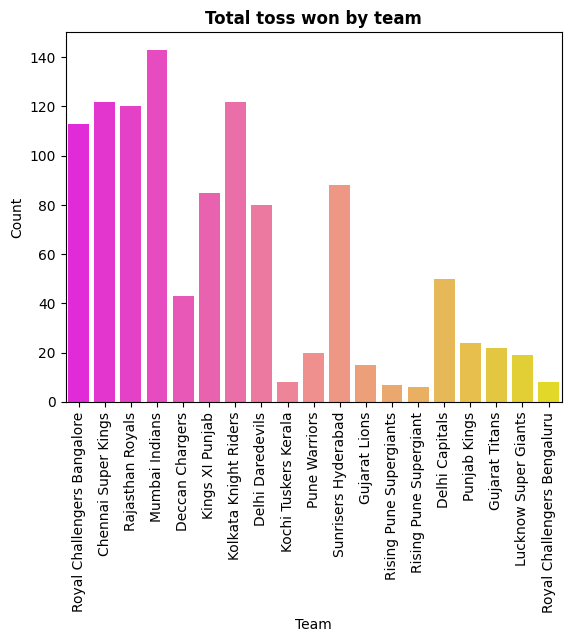

In [97]:
sns.countplot(data = m, x = "toss_winner",palette="spring")
plt.xticks(rotation = 90)
plt.xlabel("Team")
plt.ylabel("Count")
plt.title("Total toss won by team", fontweight = "bold")
plt.show()

In [101]:
# won the toss and win the match
m["won_toss_and_match"] = m["toss_winner"] == m["winner"]
gp = m.groupby(["toss_winner","toss_decision"])["won_toss_and_match"].sum().reset_index()
print(gp)

                    toss_winner toss_decision  won_toss_and_match
0           Chennai Super Kings           bat                  35
1           Chennai Super Kings         field                  40
2               Deccan Chargers           bat                  11
3               Deccan Chargers         field                   8
4                Delhi Capitals           bat                   7
5                Delhi Capitals         field                  19
6              Delhi Daredevils           bat                  11
7              Delhi Daredevils         field                  24
8                 Gujarat Lions           bat                   0
9                 Gujarat Lions         field                  10
10               Gujarat Titans           bat                   3
11               Gujarat Titans         field                  11
12              Kings XI Punjab           bat                   6
13              Kings XI Punjab         field                  30
14        

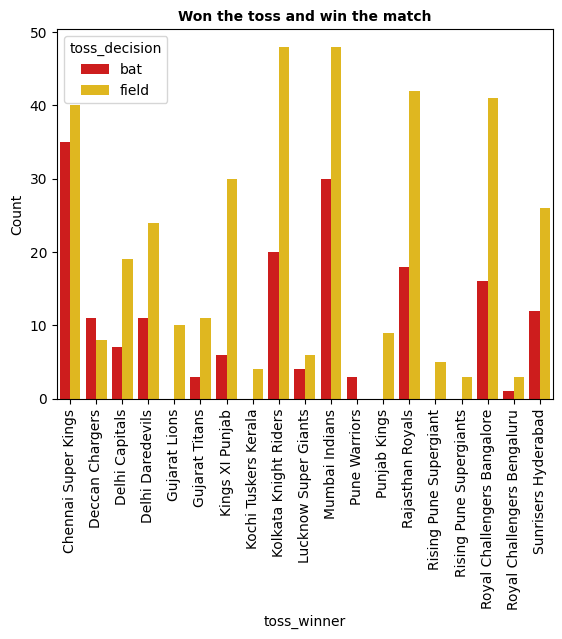

In [108]:
sns.barplot(data = gp, x = "toss_winner",y = "won_toss_and_match", hue= "toss_decision",palette="hot")
plt.title("Won the toss and win the match", fontsize = 10, fontweight = "bold")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

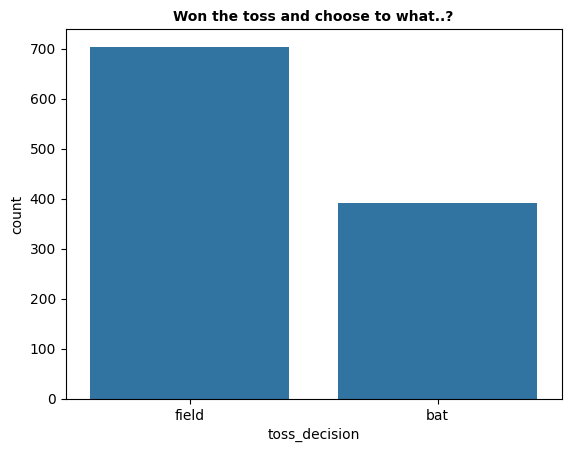

In [109]:
sns.countplot(data=m,x="toss_decision")
plt.title("Won the toss and choose to what..?", fontsize = 10, fontweight = "bold")
plt.show()

<Axes: ylabel='count'>

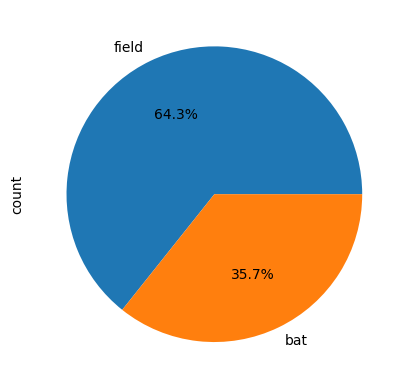

In [110]:
m["toss_decision"].value_counts().plot(kind = "pie",autopct='%1.1f%%')

<Axes: xlabel='batter'>

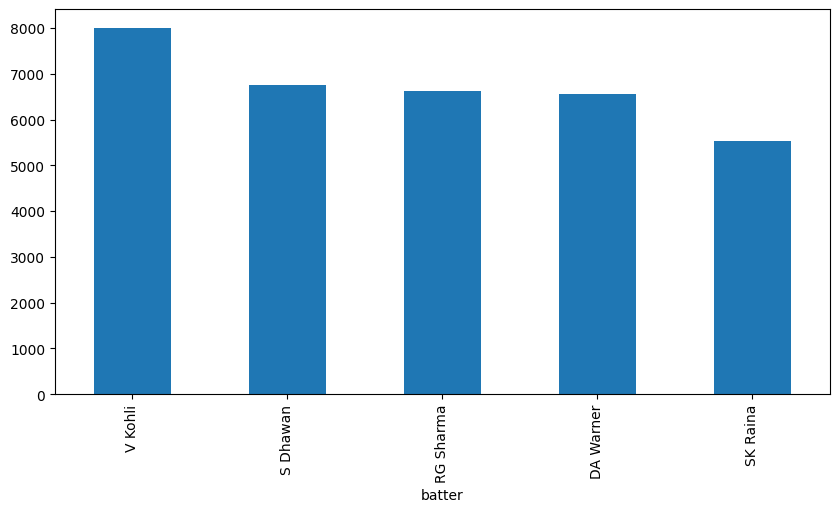

In [111]:
# Top 5 batsman who scorred maxium run
gp = d.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(5).plot(kind = "bar", figsize = (10,5))
gp

In [116]:
gp = merged.groupby(["batter","season"])["batsman_runs"].sum().sort_values(ascending=False).head(10)
print(gp)

batter         season
V Kohli        2016      973
Shubman Gill   2023      890
JC Buttler     2022      863
DA Warner      2016      848
V Kohli        2024      741
KS Williamson  2018      735
MEK Hussey     2013      733
CH Gayle       2012      733
F du Plessis   2023      730
CH Gayle       2013      720
Name: batsman_runs, dtype: int64


In [123]:
gp = d.groupby(["bowler","dismissal_kind"])["player_dismissed"].count().head(10)
print(gp)

bowler          dismissal_kind   
A Ashish Reddy  bowled               6
                caught               8
                caught and bowled    1
                lbw                  3
                run out              1
A Badoni        caught               1
                caught and bowled    1
A Chandila      caught               4
                caught and bowled    5
                stumped              2
Name: player_dismissed, dtype: int64


In [127]:
a = d["dismissal_kind"].value_counts().reset_index()
print(a)
a.columns = ["dismissal_kind", "count"]

          dismissal_kind  count
0                 caught   8063
1                 bowled   2212
2                run out   1114
3                    lbw    800
4      caught and bowled    367
5                stumped    358
6           retired hurt     15
7             hit wicket     15
8  obstructing the field      3
9            retired out      3


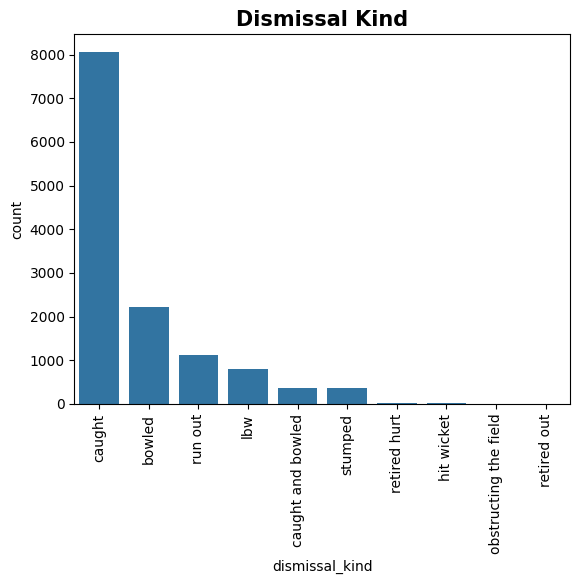

In [130]:
sns.barplot(data =a,x ="dismissal_kind",y = "count")
plt.xticks(rotation = 90)
plt.title("Dismissal Kind",fontweight="bold",fontsize=15)
plt.show()

In [131]:
eco=d.groupby("bowler").agg({"batsman_runs":"sum","ball":"count"}).sort_values(by="ball",ascending=False)
eco["economy"]=eco["batsman_runs"]/(eco["ball"]/6)
eco.head(10)

,batsman_runs,ball,economy
bowler,,,
R Ashwin,5178,4679,6.639880
SP Narine,4492,4146,6.500724
B Kumar,4744,4060,7.010837
PP Chawla,5027,3895,7.743774
RA Jadeja,4777,3895,7.358665
YS Chahal,4478,3628,7.405733
Harbhajan Singh,3928,3496,6.741419
A Mishra,4065,3444,7.081882
DJ Bravo,4178,3296,7.605583


In [132]:
gp = merged.groupby('bowler').agg({'total_runs':'sum','ball':'count','player_dismissed':'count'}).sort_values(by=['total_runs'],ascending=False).head(10)
gp

,total_runs,ball,player_dismissed
bowler,,,
R Ashwin,5435,4679,198
PP Chawla,5179,3895,201
B Kumar,5051,4060,195
RA Jadeja,4917,3895,169
YS Chahal,4681,3628,213
SP Narine,4672,4146,200
UT Yadav,4442,3190,163
DJ Bravo,4436,3296,207
A Mishra,4193,3444,183


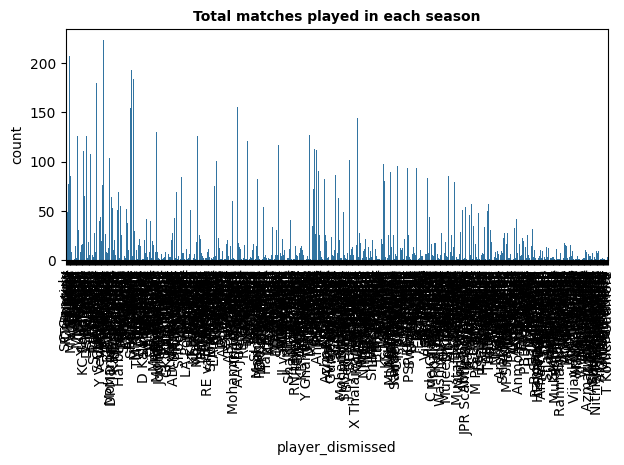

In [133]:
plt.figure(figsize=(7, 3))
sns.countplot(x="player_dismissed",data=d)
plt.xticks(rotation=90)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")
plt.show()